#Project: Dự đoán giá nhà tại California bằng mô hình Linear,SVR,RandomForest

Bộ dữ liệu này được trích xuất từ cuộc Điều tra dân số năm 1990 của California, thường được sử dụng trong các bài toán **Hồi quy** (Regression) để dự đoán giá nhà trung bình.

Dự án này sử dụng các dữ liệu thống kê tổng hợp cho mỗi khối nhà (block group) để dự đoán biến mục tiêu: **`median_house_value`** (Giá trị nhà trung bình tính bằng 100,000 USD).



#1. Thiết lập Môi trường

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#2. Thu thập và Đọc Dữ liệu

In [ ]:
file_path = '/content/housing.csv'
df = pd.read_csv(file_path)
print("Kiểm tra 5 dòng đầu tiên:")
df.head()

Kiểm tra 5 dòng đầu tiên:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print("\nThông tin tổng quan về DataFrame:")
df.info()


Thông tin tổng quan về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print("\nKiểm tra giá trị thiếu (tính theo tổng số):")
df.isnull().sum()


Kiểm tra giá trị thiếu (tính theo tổng số):


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
print(f"\nKích thước DataFrame: {df.shape[0]} hàng và {df.shape[1]} cột")


Kích thước DataFrame: 20640 hàng và 10 cột


In [ ]:
print("\nPhân tích thống kê cơ bản:")
df.describe()



Phân tích thống kê cơ bản:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
print("\nPhân bố của biến 'ocean_proximity':")
df['ocean_proximity'].value_counts()


Phân bố của biến 'ocean_proximity':


,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


#3. Phân tích Dữ liệu

##3.1. Phân tích Biến Mục tiêu (median_house_value)

###Kiểm tra Phân bố (Distribution)

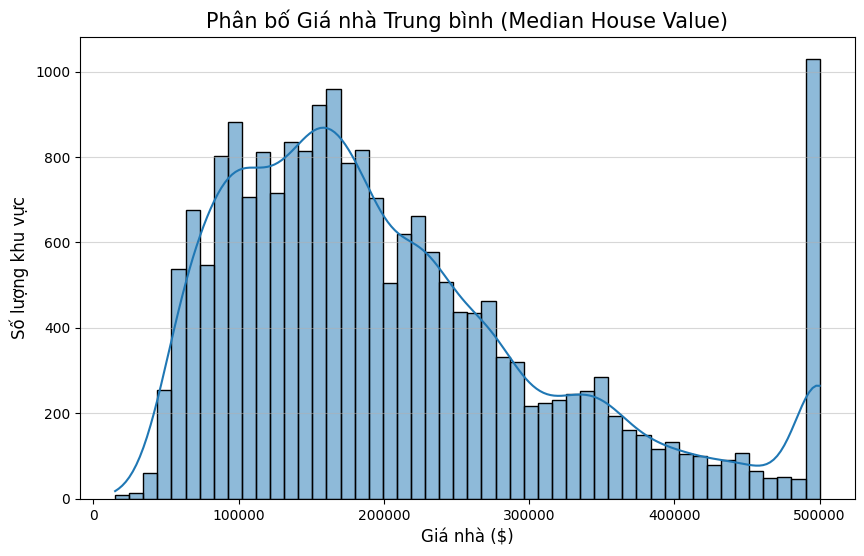

In [ ]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ Histogram kết hợp đường mật độ (KDE)
sns.histplot(df['median_house_value'], bins=50, kde=True, color='#1f77b4')

plt.title('Phân bố Giá nhà Trung bình (Median House Value)', fontsize=15)
plt.xlabel('Giá nhà ($)', fontsize=12)
plt.ylabel('Số lượng khu vực', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

###Hiện tượng "Chạm trần" (Capping)

In [ ]:
# Kiểm tra số lượng giá trị tại ngưỡng cao nhất (>= 500,000 USD)
limit_value = 500000
capped_count = df[df['median_house_value'] >= limit_value].shape[0]
total_count = df.shape[0]

print(f"Ngưỡng giới hạn trên (Capping Limit): ${limit_value}")
print(f"Số lượng khu vực bị chạm trần: {capped_count}")
print(f"Chiếm tỷ lệ: {(capped_count / total_count) * 100:.2f}% trên tổng dữ liệu.")

Ngưỡng giới hạn trên (Capping Limit): $500000
Số lượng khu vực bị chạm trần: 992
Chiếm tỷ lệ: 4.81% trên tổng dữ liệu.


###Kiểm tra Ngoại lai bằng Boxplot

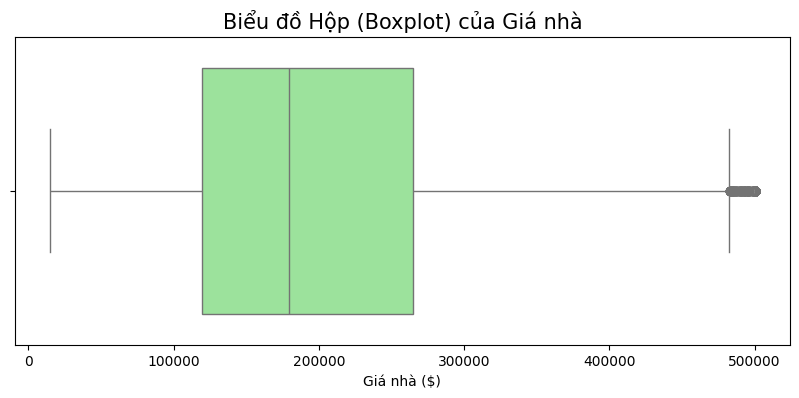

In [ ]:
plt.figure(figsize=(10, 4))

# Vẽ Boxplot nằm ngang
sns.boxplot(x=df['median_house_value'], color='lightgreen')

plt.title('Biểu đồ Hộp (Boxplot) của Giá nhà', fontsize=15)
plt.xlabel('Giá nhà ($)')
plt.show()

##3.2. Phân tích Biến Thu nhập (median_income) & Quan hệ với Giá nhà

###Phân tích Phân bố Thu nhập

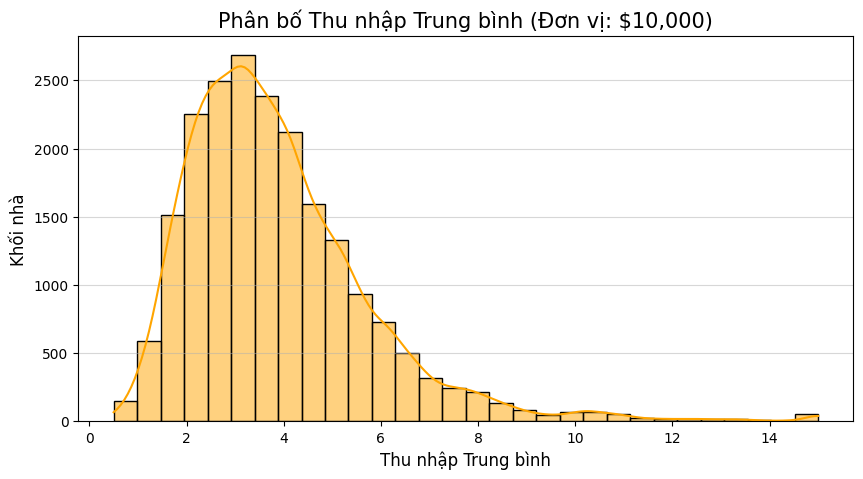

In [ ]:
plt.figure(figsize=(10, 5))

# Vẽ Histogram cho thu nhập
sns.histplot(df['median_income'], bins=30, kde=True, color='orange')

plt.title('Phân bố Thu nhập Trung bình (Đơn vị: $10,000)', fontsize=15)
plt.xlabel('Thu nhập Trung bình', fontsize=12)
plt.ylabel('Khối nhà', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

###Kiểm tra Quan hệ Tuyến tính (Quan trọng nhất)

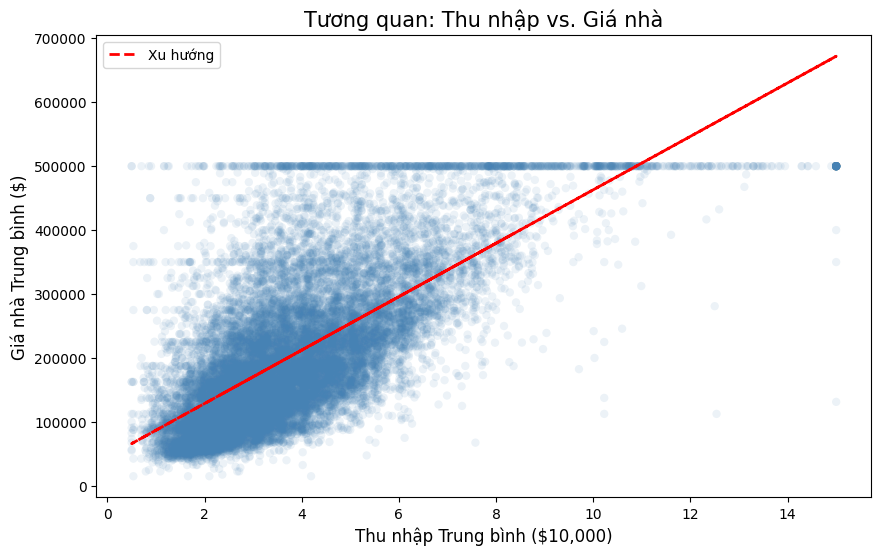

In [ ]:
plt.figure(figsize=(10, 6))

# Vẽ Scatter Plot với độ mờ (alpha) để thấy mật độ dữ liệu
plt.scatter(x=df['median_income'], y=df['median_house_value'],
            alpha=0.1, c='steelblue', edgecolors='none')

plt.title('Tương quan: Thu nhập vs. Giá nhà', fontsize=15)
plt.xlabel('Thu nhập Trung bình ($10,000)', fontsize=12)
plt.ylabel('Giá nhà Trung bình ($)', fontsize=12)

# Vẽ đường xu hướng (Trendline) đơn giản để thấy rõ hướng đi lên
z = np.polyfit(df['median_income'], df['median_house_value'], 1)
p = np.poly1d(z)
plt.plot(df['median_income'], p(df['median_income']), "r--", linewidth=2, label='Xu hướng')

plt.legend()
plt.show()

###Biểu đồ Jointplot (Phức hợp)

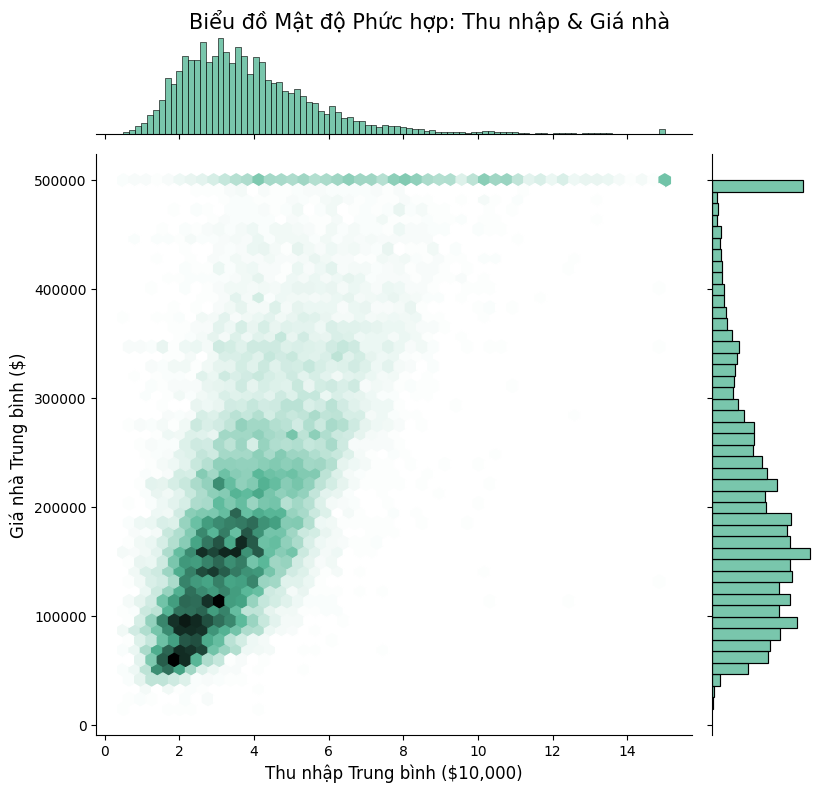

In [ ]:
# Vẽ Jointplot để thấy chi tiết phân bố biên và tương quan
joint_plot = sns.jointplot(x='median_income', y='median_house_value', data=df,
                           kind='hex', color='#4CB391', height=8)

# Đặt lại tên trục cho rõ ràng
joint_plot.set_axis_labels('Thu nhập Trung bình ($10,000)', 'Giá nhà Trung bình ($)', fontsize=12)
plt.subplots_adjust(top=0.95)
joint_plot.fig.suptitle('Biểu đồ Mật độ Phức hợp: Thu nhập & Giá nhà', fontsize=15)
plt.show()

##3.3. Phân tích Cấu trúc Nhà, Dân số & Tuổi nhà

###Kiểm tra Phân bố (Long-tail)

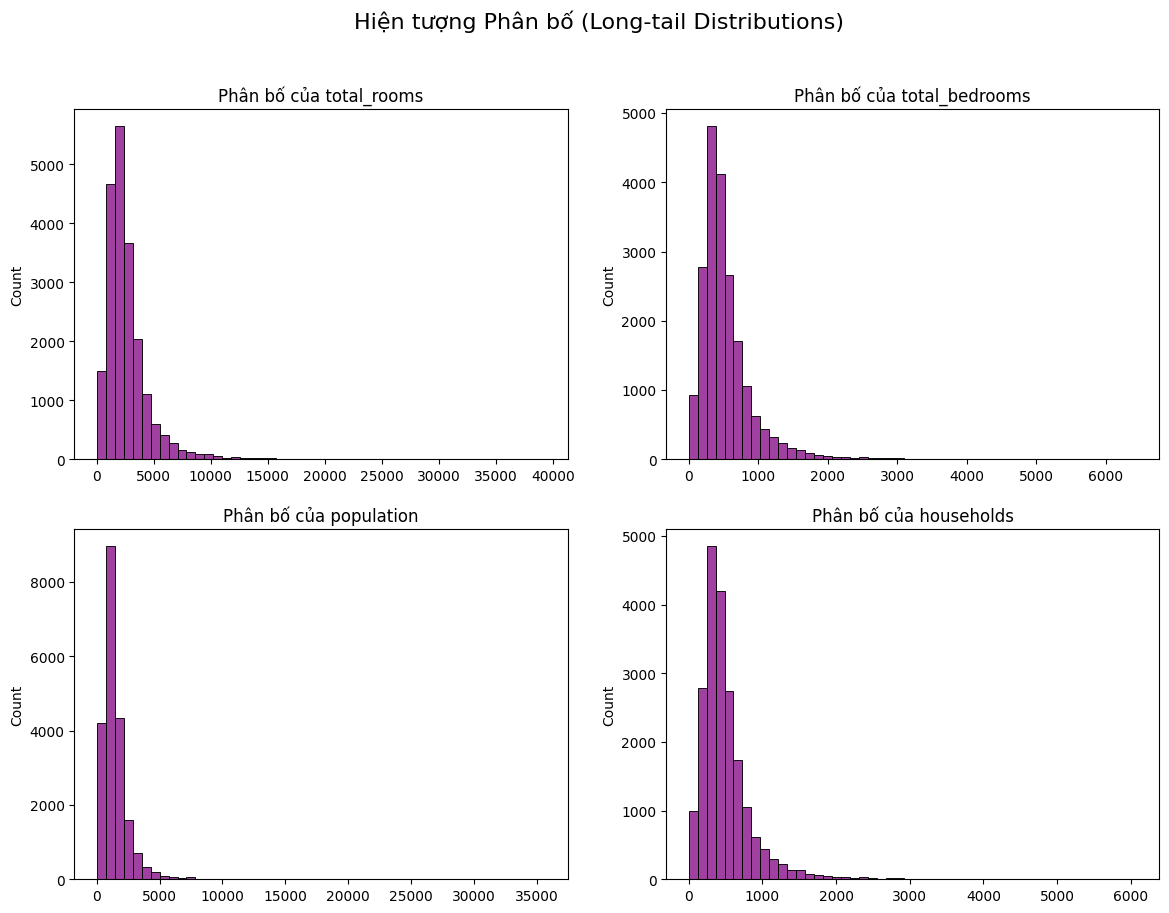

In [ ]:
# Danh sách các cột cần kiểm tra phân bố
cols_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Tạo khung vẽ 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(cols_to_plot):
    row, col_idx = divmod(i, 2)
    # Vẽ histogram
    sns.histplot(df[col].dropna(), bins=50, ax=axes[row, col_idx], color='purple')
    axes[row, col_idx].set_title(f'Phân bố của {col}', fontsize=12)
    axes[row, col_idx].set_xlabel('')

plt.suptitle('Hiện tượng Phân bố (Long-tail Distributions)', fontsize=16)
plt.show()

###Soi biến Tuổi nhà (housing_median_age)

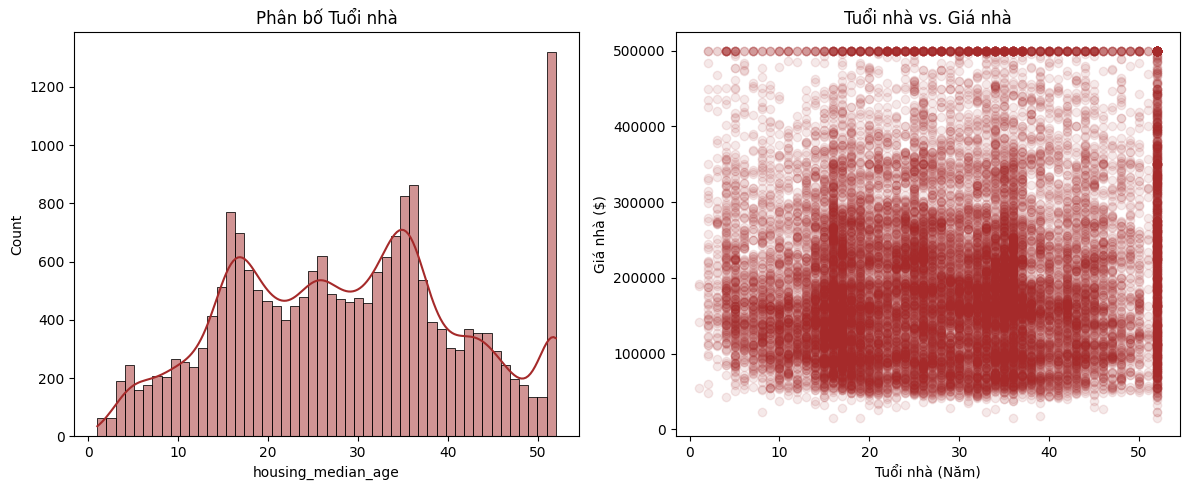

Tuổi nhà lớn nhất trong dữ liệu: 52.0 năm
Số lượng khu vực có tuổi nhà = 52.0: 1273


In [ ]:
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân bố tuổi nhà
plt.subplot(1, 2, 1)
sns.histplot(df['housing_median_age'], bins=50, color='brown', kde=True)
plt.title('Phân bố Tuổi nhà')

# Biểu đồ 2: Quan hệ Tuổi nhà vs Giá nhà
plt.subplot(1, 2, 2)
plt.scatter(df['housing_median_age'], df['median_house_value'], alpha=0.1, color='brown')
plt.title('Tuổi nhà vs. Giá nhà')
plt.xlabel('Tuổi nhà (Năm)')
plt.ylabel('Giá nhà ($)')

plt.tight_layout()
plt.show()

# Kiểm tra số lượng bị chặn trần ở mức tối đa (thường là 52)
max_age = df['housing_median_age'].max()
print(f"Tuổi nhà lớn nhất trong dữ liệu: {max_age} năm")
print(f"Số lượng khu vực có tuổi nhà = {max_age}: {df[df['housing_median_age'] == max_age].shape[0]}")

###Kiểm tra Đa cộng tuyến (Multicollinearity)

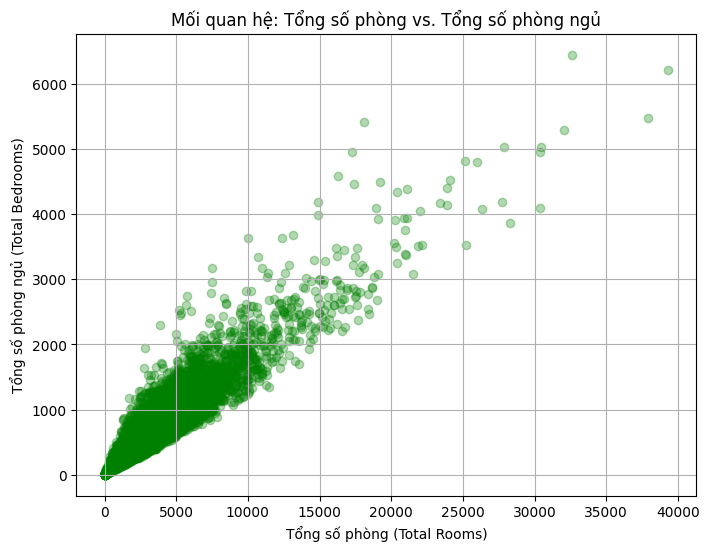

Hệ số tương quan giữa Rooms và Bedrooms: 0.9304


In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(df['total_rooms'], df['total_bedrooms'], alpha=0.3, c='green')
plt.title('Mối quan hệ: Tổng số phòng vs. Tổng số phòng ngủ')
plt.xlabel('Tổng số phòng (Total Rooms)')
plt.ylabel('Tổng số phòng ngủ (Total Bedrooms)')
plt.grid(True)
plt.show()

# Tính hệ số tương quan
corr_rooms_bed = df['total_rooms'].corr(df['total_bedrooms'])
print(f"Hệ số tương quan giữa Rooms và Bedrooms: {corr_rooms_bed:.4f}")

##3.4. Phân tích Địa lý (Geographical Analysis)

### Bản đồ Tương tác thực tế, giá nhà và dân số (Interactive Map)


In [ ]:
import plotly.express as px

# Tạo bản đồ tương tác với thiết lập kích thước cụ thể
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="median_house_value",
                        size="population",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=5,
                        mapbox_style="open-street-map",
                        title="Bản đồ Tương tác: Phân bố Giá nhà & Dân cư California",
                        # THIẾT LẬP KÍCH THƯỚC:
                        height=800,
                        width=1400
                       )
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

fig.show()

##3.5. Phân tích Biến Phân loại (ocean_proximity)"

### Boxplot Phân tích Giá theo Vị trí

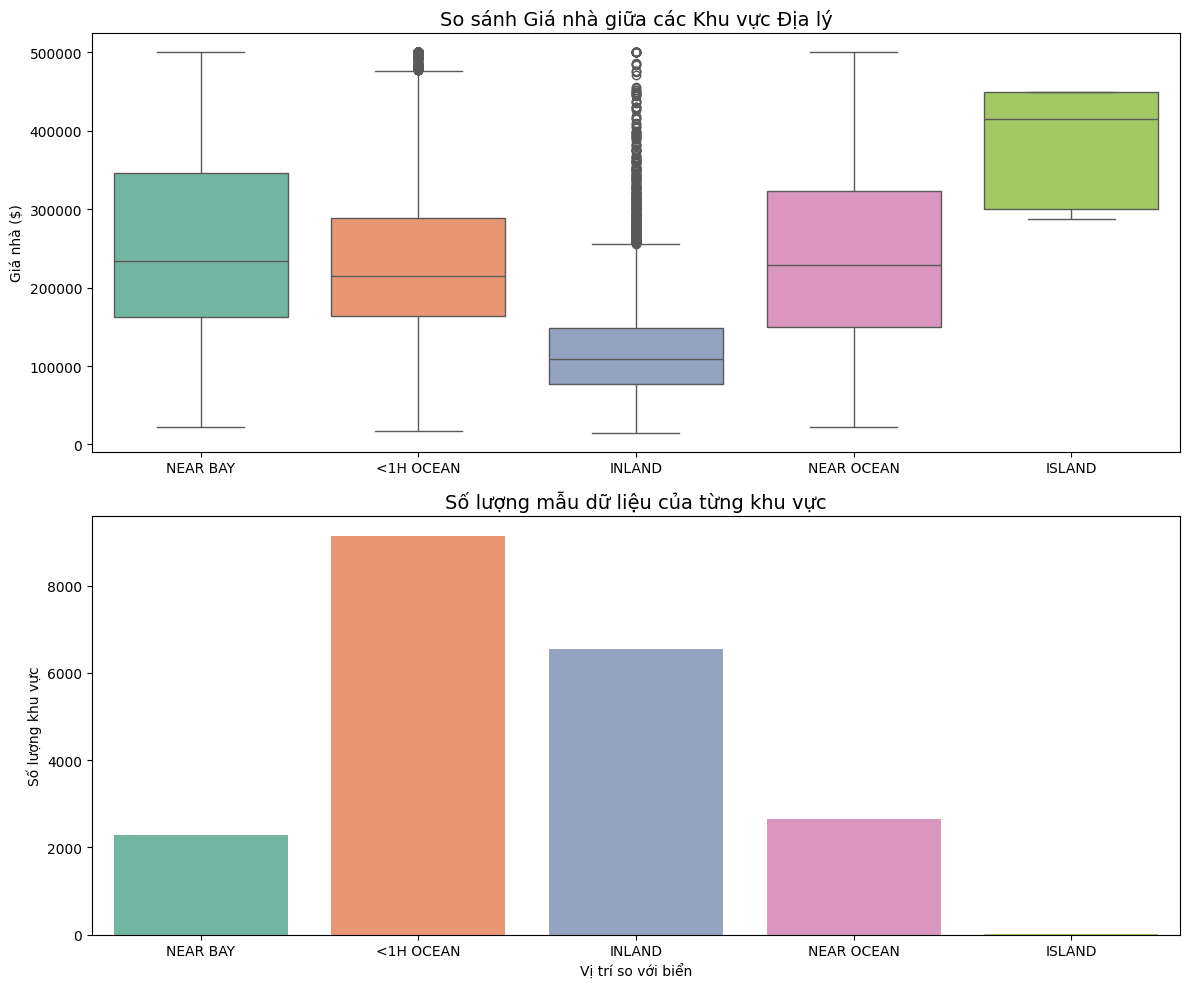

In [ ]:
plt.figure(figsize=(12, 10))

# Biểu đồ 1: Hộp so sánh giá
plt.subplot(2, 1, 1)
# Đã thêm hue và legend=False để sửa cảnh báo
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, hue='ocean_proximity', legend=False, palette='Set2')
plt.title('So sánh Giá nhà giữa các Khu vực Địa lý', fontsize=14)
plt.xlabel('')
plt.ylabel('Giá nhà ($)')

# Biểu đồ 2: Đếm số lượng mẫu
plt.subplot(2, 1, 2)
# Đã thêm hue và legend=False để sửa cảnh báo
sns.countplot(x='ocean_proximity', data=df, hue='ocean_proximity', legend=False, palette='Set2')
plt.title('Số lượng mẫu dữ liệu của từng khu vực', fontsize=14)
plt.xlabel('Vị trí so với biển')
plt.ylabel('Số lượng khu vực')

plt.tight_layout()
plt.show()

##3.6. Tổng kết Tương quan (Correlation Summary)"

### Ma trận Tương quan (Heatmap)

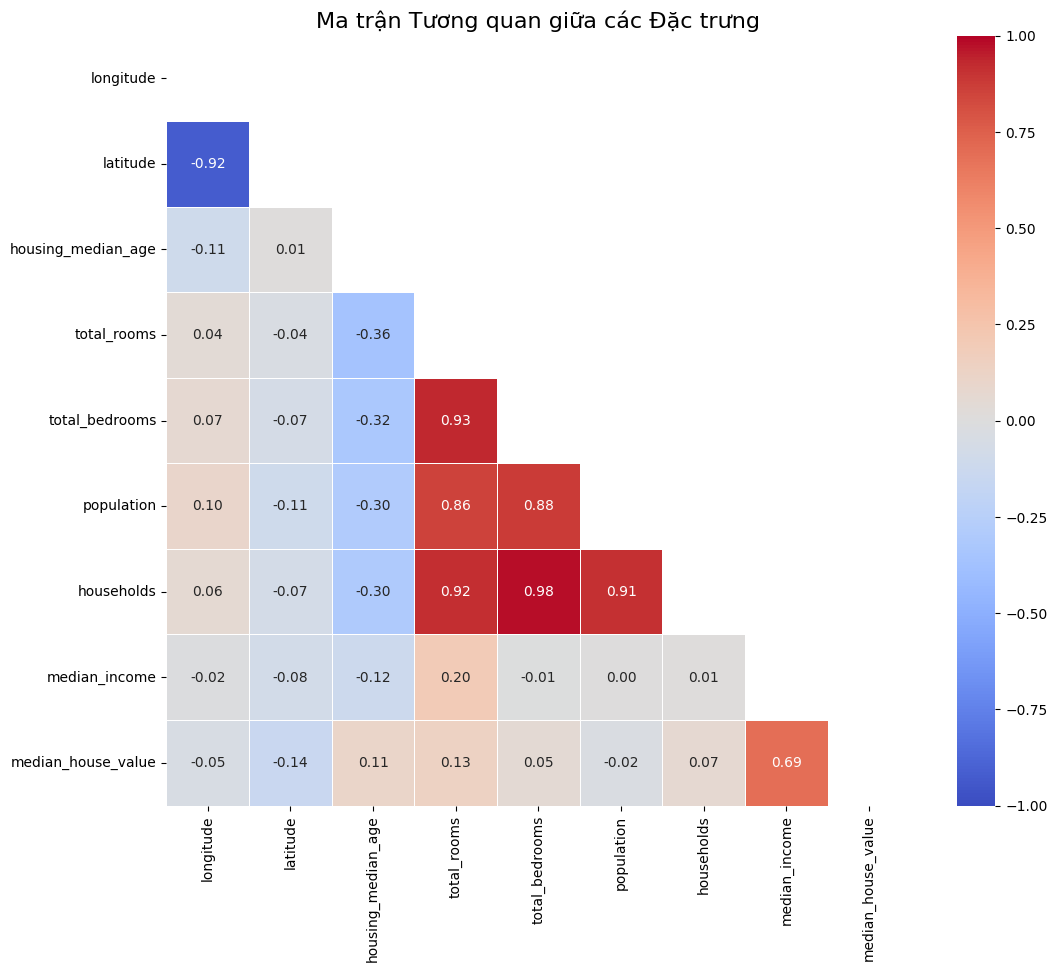

In [ ]:
plt.figure(figsize=(12, 10))

# Tính toán ma trận tương quan (chỉ dùng các cột số)
corr_matrix = df.corr(numeric_only=True)

# Tạo mask để che nửa trên tam giác (cho đỡ rối)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Vẽ Heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Ma trận Tương quan giữa các Đặc trưng', fontsize=16)
plt.show()

###Bảng Xếp hạng Ảnh hưởng đến Giá nhà

In [ ]:
# Sắp xếp mức độ tương quan với biến mục tiêu (median_house_value)
print("Mức độ tương quan với Giá nhà (Median House Value):")
print(corr_matrix['median_house_value'].sort_values(ascending=False))

Mức độ tương quan với Giá nhà (Median House Value):
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


#4. Tiền xử lý dữ liệu

##Nhiệm vụ 1: Làm sạch và Sửa lỗi (Cleaning & Fixing)


### Loại bỏ dữ liệu nhiễu (Capping Removal)

In [ ]:
# Kiểm tra kích thước trước khi xóa
print(f"Kích thước ban đầu: {df.shape}")

# Loại bỏ các dữ liệu bị chặn trần (Capped Data)
# Chỉ giữ lại các hàng có giá nhà < 500,000
df_clean = df[df['median_house_value'] < 500000].copy()

# Kiểm tra lại
print(f"Kích thước sau khi loại bỏ outlier: {df_clean.shape}")
print(f"Đã loại bỏ {df.shape[0] - df_clean.shape[0]} hàng nhiễu.")

Kích thước ban đầu: (20640, 10)
Kích thước sau khi loại bỏ outlier: (19648, 10)
Đã loại bỏ 992 hàng nhiễu.


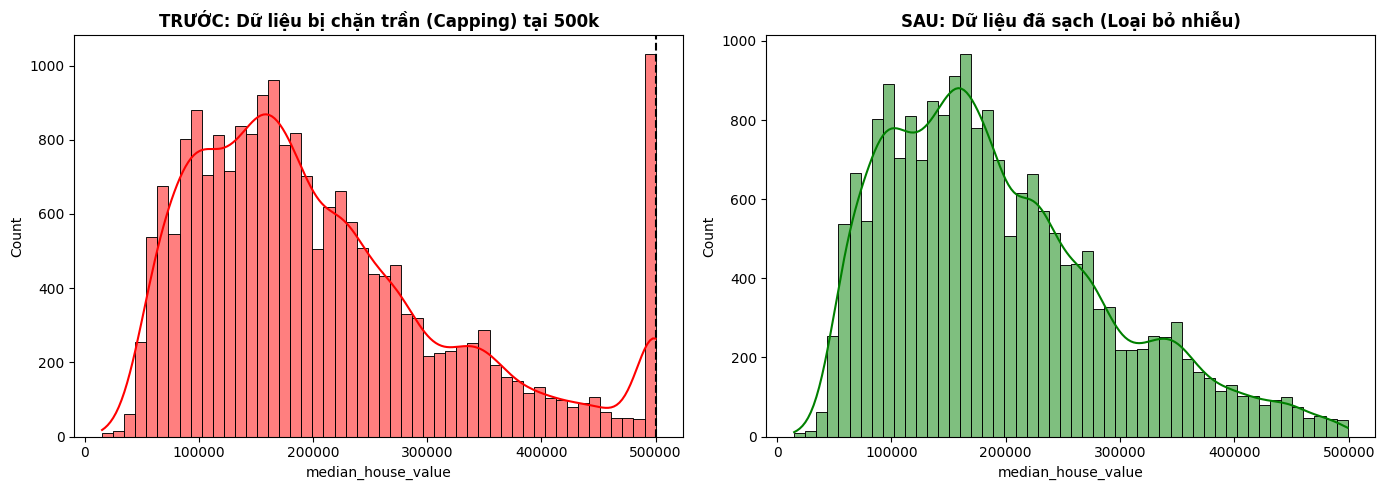

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Trước khi lọc (Dữ liệu gốc có trong df) - Minh họa lại
# Lưu ý: Bạn cần chắc chắn biến 'df' gốc chưa bị ghi đè, hoặc vẽ cái này trước khi chạy lệnh lọc
sns.histplot(df['median_house_value'], bins=50, kde=True, ax=axes[0], color='red')
axes[0].set_title('TRƯỚC: Dữ liệu bị chặn trần (Capping) tại 500k', fontsize=12, fontweight='bold')
axes[0].axvline(500000, color='black', linestyle='--') # Đường kẻ chỉ điểm lỗi

# 2. Sau khi lọc (Dữ liệu trong df_clean)
sns.histplot(df_clean['median_house_value'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('SAU: Dữ liệu đã sạch (Loại bỏ nhiễu)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

###Xử lý dữ liệu thiếu (Imputation)

In [ ]:
# Tính toán giá trị trung vị của cột total_bedrooms
median_bedrooms = df_clean['total_bedrooms'].median()

# Điền giá trị thiếu
df_clean['total_bedrooms'] = df_clean['total_bedrooms'].fillna(median_bedrooms)

# Kiểm tra lại xem còn null không
print(f"Số lượng giá trị thiếu sau khi xử lý: {df_clean['total_bedrooms'].isnull().sum()}")

Số lượng giá trị thiếu sau khi xử lý: 0


###Mã hóa biến phân loại (One-Hot Encoding)

In [ ]:
# Sử dụng Pandas get_dummies để One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=['ocean_proximity'], dtype=int)

# Xem 5 dòng đầu sau khi mã hóa
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


##Nhiệm vụ 2: Nâng cấp và Chuẩn hóa (Engineering & Scaling)

###Kỹ thuật Đặc trưng (Feature Engineering)



Mô tả: Ý nghĩa của các Đặc trưng Kỹ thuật mới

Thay vì sử dụng các con số tổng cộng vô tri (như Tổng số phòng cả khu), chúng ta tạo ra 3 chỉ số thực tế để đánh giá chất lượng từng ngôi nhà:

1.  **`rooms_per_household` $\rightarrow$ Độ lớn ngôi nhà (House Size):**
    *   *Công thức:* Tổng số phòng / Số hộ.
    *   *Ý nghĩa:* Cho biết trung bình mỗi căn nhà ở đây to hay nhỏ. (Ví dụ: 8 phòng $\rightarrow$ Biệt thự; 3 phòng $\rightarrow$ Chung cư nhỏ).
2.  **`bedrooms_per_room` $\rightarrow$ Độ đẳng cấp/Tiện nghi (Luxury Factor):**
    *   *Công thức:* Số phòng ngủ / Tổng số phòng.
    *   *Ý nghĩa:* Tỷ lệ này càng **thấp** chứng tỏ nhà càng sang (tức là nhà có nhiều phòng khách, phòng ăn, phòng giải trí rộng rãi thay vì chỉ chi chít phòng ngủ).
3.  **`population_per_household` $\rightarrow$ Mật độ cư trú (Crowding):**
    *   *Công thức:* Dân số / Số hộ.
    *   *Ý nghĩa:* Cho biết trung bình có bao nhiêu người sống trong một nhà. Chỉ số này cao thường ám chỉ sự chật chội, đông đúc (đặc trưng của các khu nhà giá rẻ).



In [ ]:
# Tạo các đặc trưng mới (tỷ lệ)
df_clean['rooms_per_household'] = df_clean['total_rooms'] / df_clean['households']
df_clean['bedrooms_per_room'] = df_clean['total_bedrooms'] / df_clean['total_rooms']
df_clean['population_per_household'] = df_clean['population'] / df_clean['households']

# Kiểm tra tương quan của biến mới với giá nhà
new_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']
print(df_clean[new_features].corr()['median_house_value'])

rooms_per_household         0.111581
bedrooms_per_room          -0.199623
population_per_household   -0.021205
median_house_value          1.000000
Name: median_house_value, dtype: float64


1. `bedrooms_per_room` = -0.199 (Quan trọng nhất)
*   **Dấu Âm (-):** Nghĩa là **Tương quan nghịch**. Khi chỉ số này càng cao, giá nhà càng thấp.
*   **Giải thích thực tế:**
    *   Chỉ số này cao nghĩa là ngôi nhà có rất nhiều phòng ngủ so với tổng diện tích (ví dụ: nhà trọ, chung cư mật độ cao).
    *   Chỉ số này thấp nghĩa là ngôi nhà có ít phòng ngủ nhưng nhiều phòng chức năng khác (phòng khách lớn, phòng giải trí...) $\rightarrow$ Đây là đặc điểm của **Biệt thự/Nhà cao cấp**.
*   **Kết luận:** Với mức tương quan gần **-0.2**, đây là một đặc trưng **rất tốt** giúp mô hình phân biệt được nhà "sang" và nhà "bình dân".

2. `rooms_per_household` = +0.111
*   **Dấu Dương (+):** Nghĩa là **Tương quan thuận**. Nhà càng nhiều phòng (nhà càng to), giá càng cao.
*   **Giải thích thực tế:** Đây là logic hiển nhiên. Nhà to hơn thì thường đắt hơn.
*   **Kết luận:** Mức tương quan **+0.11** cho thấy nó có tác dụng dự báo tốt hơn hẳn so với việc để biến `total_rooms` đứng một mình.

3. `population_per_household` = -0.021
*   **Dấu Âm (-):** Mật độ người càng đông, giá càng giảm (nhưng giảm rất ít).
*   **Kết luận:** Con số -0.02 khá nhỏ (gần bằng 0), cho thấy mối liên hệ tuyến tính ở đây yếu. Tuy nhiên, các thuật toán phi tuyến tính như **Random Forest** vẫn có thể khai thác được nó để phát hiện các khu ổ chuột (nơi mật độ người cực cao).



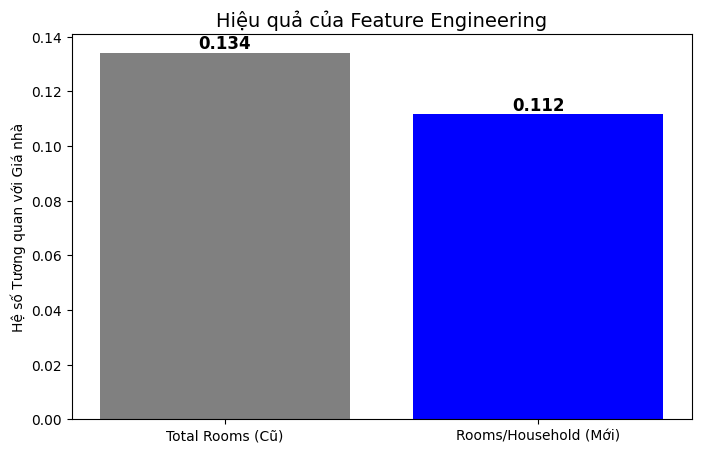

In [ ]:
# Tính độ tương quan
corr_old = df['total_rooms'].corr(df['median_house_value'])
corr_new = df_clean['rooms_per_household'].corr(df_clean['median_house_value'])

# Vẽ biểu đồ so sánh
plt.figure(figsize=(8, 5))
bars = plt.bar(['Total Rooms (Cũ)', 'Rooms/Household (Mới)'], [corr_old, corr_new], color=['gray', 'blue'])

plt.title('Hiệu quả của Feature Engineering', fontsize=14)
plt.ylabel('Hệ số Tương quan với Giá nhà')
plt.axhline(0, color='black', linewidth=0.5)

# Hiển thị con số cụ thể trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

###Phân chia tập dữ liệu (Train/Test Split)

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Tách biến mục tiêu (y) và đặc trưng (X)
X = df_clean.drop("median_house_value", axis=1) # X là tất cả trừ giá nhà
y = df_clean["median_house_value"]              # y là giá nhà

# 2. Chia tập dữ liệu: 80% Train, 20% Test
# random_state=42 giúp cố định kết quả để tái hiện sau này
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập Huấn luyện: {X_train.shape}")
print(f"Kích thước tập Kiểm tra: {X_test.shape}")

Kích thước tập Huấn luyện: (15718, 16)
Kích thước tập Kiểm tra: (3930, 16)


### Chuẩn hóa dữ liệu (Feature Scaling) - Quan trọng cho SVR

SVR tính khoảng cách Euclidean. Nếu không đưa về cùng hệ quy chiếu (Standardization), biến population sẽ lấn át hoàn toàn income

In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

# Fit và Transform trên tập Train
X_train_scaled = scaler.fit_transform(X_train)

# Chỉ Transform trên tập Test (không Fit lại!)
X_test_scaled = scaler.transform(X_test)

# Chuyển đổi lại thành DataFrame để dễ theo dõi (tùy chọn, nhưng tốt cho minh bạch)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Đã chuẩn hóa xong. Dữ liệu sẵn sàng cho Model.")
X_train_scaled.head(3)

Đã chuẩn hóa xong. Dữ liệu sẵn sàng cho Model.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
12794,-0.941677,1.381953,-0.674511,-0.502312,-0.509384,-0.134863,-0.449105,-1.283215,-0.878772,1.416511,-0.017838,-0.348357,-0.374687,-0.312952,-0.040083,0.066954
14570,1.180228,-1.317806,0.524011,-0.165260,-0.088946,-0.089364,0.023727,-0.146519,-0.878772,-0.705960,-0.017838,-0.348357,2.668894,-0.398856,0.096502,-0.042600
9328,-1.475897,1.065974,0.524011,-0.778949,-0.814083,-0.885162,-0.787580,0.199101,-0.878772,-0.705960,-0.017838,2.870618,-0.374687,-0.319623,-0.028733,-0.086865


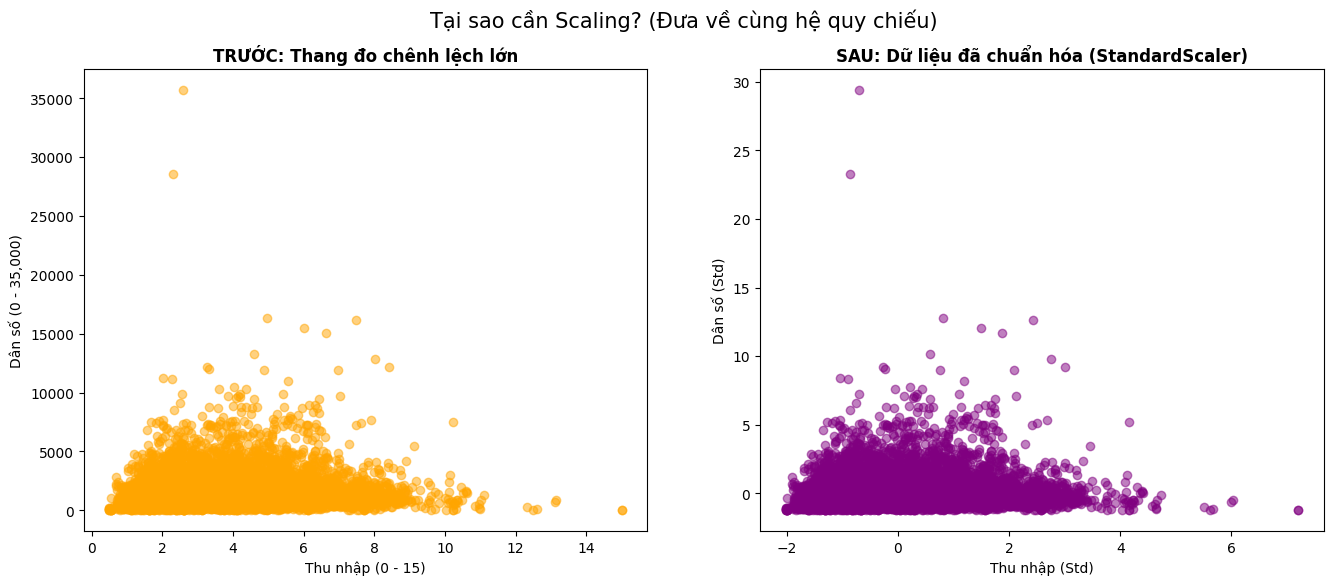

In [ ]:
# Chuyển X_train (chưa scale) thành DataFrame tạm để vẽ (nếu cần)
# Ở cell 5 bạn đã có X_train rồi.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Trước khi Scale (Dữ liệu Thô)
# So sánh Thu nhập (số bé) và Dân số (số to)
ax1.scatter(X_train['median_income'], X_train['population'], alpha=0.5, color='orange')
ax1.set_title('TRƯỚC: Thang đo chênh lệch lớn', fontsize=12, fontweight='bold')
ax1.set_xlabel('Thu nhập (0 - 15)')
ax1.set_ylabel('Dân số (0 - 35,000)')

# 2. Sau khi Scale (Dữ liệu Chuẩn hóa)
# Dùng X_train_scaled
ax2.scatter(X_train_scaled['median_income'], X_train_scaled['population'], alpha=0.5, color='purple')
ax2.set_title('SAU: Dữ liệu đã chuẩn hóa (StandardScaler)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Thu nhập (Std)')
ax2.set_ylabel('Dân số (Std)')

plt.suptitle('Tại sao cần Scaling? (Đưa về cùng hệ quy chiếu)', fontsize=15)
plt.show()

#5. Huấn luyện Mô hình

###Huấn luyện Linear Regression (Baseline)

In [ ]:
print("Đang huấn luyện Linear Regression...")
# 1. Khởi tạo
lin_reg = LinearRegression()

# 2. Huấn luyện (Fit)
lin_reg.fit(X_train_scaled, y_train)

print("Hoàn tất huấn luyện Linear Regression.")

Đang huấn luyện Linear Regression...
Hoàn tất huấn luyện Linear Regression.


###Huấn luyện Support Vector Regression (SVR)

In [ ]:
print("Đang huấn luyện SVR (Có thể mất 1-2 phút)...")
# 1. Khởi tạo
# kernel='rbf': Phù hợp cho dữ liệu phi tuyến tính
# C=1.0, epsilon=0.1: Các tham số mặc định (sẽ tinh chỉnh ở Bước 6 nếu cần)
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# 2. Huấn luyện
svr_reg.fit(X_train_scaled, y_train)

print("Hoàn tất huấn luyện SVR.")

Đang huấn luyện SVR (Có thể mất 1-2 phút)...
Hoàn tất huấn luyện SVR.


###Huấn luyện Random Forest

In [ ]:
print("Đang huấn luyện Random Forest...")
# 1. Khởi tạo
# n_estimators=100: Sử dụng 100 cây quyết định
# random_state=42: Để đảm bảo kết quả giống nhau mỗi lần chạy
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Huấn luyện
rf_reg.fit(X_train_scaled, y_train)

print("Hoàn tất huấn luyện Random Forest.")

Đang huấn luyện Random Forest...
Hoàn tất huấn luyện Random Forest.


#6. Đánh giá và so sánh

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Định nghĩa danh sách các mô hình cần đánh giá
models = [lin_reg, svr_reg, rf_reg]
model_names = ["Linear Regression", "SVR", "Random Forest"]

# 2. Tạo list để lưu kết quả
results = []

for model, name in zip(models, model_names):
    # Dự đoán
    y_pred = model.predict(X_test_scaled)

    # Tính toán 3 chỉ số
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Lưu vào list
    results.append({
        "Mô hình": name,
        "MAE (Sai số tuyệt đối)": mae,
        "MSE (Bình phương sai số)": mse,
        "R2 Score (Độ chính xác)": r2
    })

# Chuyển thành DataFrame (Bảng)
results_df = pd.DataFrame(results)

# Định dạng số: Thêm dấu phẩy ngăn cách hàng nghìn, làm tròn 2 số thập phân
styled_results = results_df.style.format({
    "MAE (Sai số tuyệt đối)": "${:,.2f}",
    "MSE (Bình phương sai số)": "{:,.2f}",
    "R2 Score (Độ chính xác)": "{:.4f}"
}).background_gradient(cmap='Blues', subset=["R2 Score (Độ chính xác)"]) # Tô màu cột R2 (đậm là tốt)

# Hiển thị bảng
styled_results

,Mô hình,MAE (Sai số tuyệt đối),MSE (Bình phương sai số),R2 Score (Độ chính xác)
0,Linear Regression,"$44,825.33","3,661,755,729.56",0.6181
1,SVR,"$76,485.45","9,828,697,621.07",-0.0252
2,Random Forest,"$31,027.62","2,164,309,717.87",0.7743


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Lấy cây đầu tiên trong khu rừng (estimator số 0)
first_tree = rf_reg.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(first_tree,
          feature_names=X.columns, # Tên các đặc trưng
          filled=True,             # Tô màu
          rounded=True,            # Bo tròn góc
          max_depth=3,             # Chỉ vẽ 3 tầng đầu (vì cây rất sâu, vẽ hết sẽ rối)
          fontsize=10)

plt.title("Cấu trúc của 1 Cây trong Rừng ngẫu nhiên (Zoom 3 tầng đầu)", fontsize=15)
plt.show()

#DEMO

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

# --- 1. HÀM XỬ LÝ BACKEND NÂNG CAO ---
def advanced_prediction(median_income, housing_median_age, total_rooms, total_bedrooms,
                        population, households, latitude, longitude, ocean_proximity):

    # --- A. DỰ ĐOÁN GIÁ ---
    # (Logic y hệt như cũ)
    model_columns = X.columns
    input_df = pd.DataFrame(np.zeros((1, len(model_columns))), columns=model_columns)

    input_df['median_income'] = median_income
    input_df['housing_median_age'] = housing_median_age
    input_df['total_rooms'] = total_rooms
    input_df['total_bedrooms'] = total_bedrooms
    input_df['population'] = population
    input_df['households'] = households
    input_df['latitude'] = latitude
    input_df['longitude'] = longitude

    input_df['rooms_per_household'] = total_rooms / (households + 0.001)
    input_df['bedrooms_per_room'] = total_bedrooms / (total_rooms + 0.001)
    input_df['population_per_household'] = population / (households + 0.001)

    for col in input_df.columns:
        if 'ocean_proximity' in col: input_df[col] = 0
    if f'ocean_proximity_{ocean_proximity}' in input_df.columns:
        input_df[f'ocean_proximity_{ocean_proximity}'] = 1

    input_scaled = scaler.transform(input_df)
    predicted_price = rf_reg.predict(input_scaled)[0]

    # --- B. VẼ ĐỒNG HỒ ĐO GIÁ (GAUGE CHART) ---
    # So sánh giá dự đoán với Min/Max của dữ liệu thật
    gauge_fig = go.Figure(go.Indicator(
        mode = "gauge+number",
        value = predicted_price,
        domain = {'x': [0, 1], 'y': [0, 1]},
        title = {'text': "Định giá ($)"},
        gauge = {
            'axis': {'range': [10000, 500000], 'tickwidth': 1},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 150000], 'color': "#90EE90"},  # Rẻ (Xanh)
                {'range': [150000, 350000], 'color': "#FFD700"}, # TB (Vàng)
                {'range': [350000, 500000], 'color': "#FF6347"}], # Đắt (Đỏ)
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': predicted_price}
        }
    ))
    gauge_fig.update_layout(height=250, margin=dict(l=10, r=10, t=30, b=10))

    # --- C. VẼ BẢN ĐỒ VỊ TRÍ (MINI MAP) ---
    # Tạo một dataframe nhỏ chỉ chứa điểm đang chọn
    map_df = pd.DataFrame({'lat': [latitude], 'lon': [longitude], 'text': [ocean_proximity]})

    map_fig = px.scatter_mapbox(map_df, lat="lat", lon="lon", hover_name="text",
                                zoom=5, height=300)
    map_fig.update_layout(mapbox_style="open-street-map")
    map_fig.update_traces(marker=dict(size=15, color='red'))
    map_fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))

    return f"${predicted_price:,.2f}", gauge_fig, map_fig


# --- 2. THIẾT KẾ GIAO DIỆN (FRONTEND) ---
# Sử dụng gr.Blocks để tùy biến bố cục linh hoạt
with gr.Blocks(theme=gr.themes.Soft()) as demo:

    gr.Markdown("""
    # 🏠 AI Real Estate Valuator - California
    ### Hệ thống định giá bất động sản thông minh sử dụng Random Forest
    """)

    with gr.Row():
        # --- CỘT TRÁI: INPUT ---
        with gr.Column(scale=1):
            gr.Markdown("### 1. Thông số Vị trí")
            with gr.Row():
                lat_input = gr.Slider(32.5, 42, value=37.8, label="Vĩ độ (Bắc/Nam)")
                lon_input = gr.Slider(-124.5, -114, value=-122.2, label="Kinh độ (Đông/Tây)")

            ocean_input = gr.Dropdown(["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"],
                                      value="NEAR BAY", label="Phân loại Vị trí")

            gr.Markdown("---")
            gr.Markdown("### 2. Thông số Căn nhà & Dân cư")
            income_input = gr.Slider(0.5, 15, value=8.0, label="Thu nhập khu vực (x$10k)")
            age_input = gr.Slider(1, 52, value=30, step=1, label="Tuổi đời nhà (Năm)")

            with gr.Accordion("Chi tiết kỹ thuật (Mở rộng)", open=False):
                rooms_input = gr.Slider(100, 10000, value=2000, label="Tổng số phòng")
                bedrooms_input = gr.Slider(10, 5000, value=400, label="Tổng phòng ngủ")
                pop_input = gr.Slider(100, 5000, value=1000, label="Dân số")
                house_input = gr.Slider(10, 2000, value=300, label="Số hộ")

            predict_btn = gr.Button("🔮 ĐỊNH GIÁ NGAY", variant="primary")

        # --- CỘT PHẢI: OUTPUT ---
        with gr.Column(scale=1):
            gr.Markdown("### 📊 Kết quả Phân tích")

            # Kết quả text
            price_output = gr.Textbox(label="Giá trị ước tính",
                                      text_align="center",
                                      show_copy_button=True)

            # Đồng hồ đo
            gauge_output = gr.Plot(label="Thước đo giá trị")

            # Bản đồ
            map_output = gr.Plot(label="Vị trí trên bản đồ thực địa")

    # --- SỰ KIỆN XỬ LÝ ---
    predict_btn.click(
        fn=advanced_prediction,
        inputs=[income_input, age_input, rooms_input, bedrooms_input,
                pop_input, house_input, lat_input, lon_input, ocean_input],
        outputs=[price_output, gauge_output, map_output]
    )

    # --- DỮ LIỆU MẪU (PRESETS) ---
    # Giúp người dùng chọn nhanh kịch bản
    gr.Examples(
        examples=[
            [8.3, 41, 880, 129, 322, 126, 37.88, -122.23, "NEAR BAY"], # San Francisco (Giàu)
            [2.5, 20, 2000, 500, 1500, 400, 36.5, -119.5, "INLAND"],   # Central Valley (Nghèo)
            [5.0, 10, 3000, 600, 1000, 500, 34.0, -118.2, "NEAR OCEAN"] # Los Angeles (Ven biển)
        ],
        inputs=[income_input, age_input, rooms_input, bedrooms_input,
                pop_input, house_input, lat_input, lon_input, ocean_input],
        label="⚡ Chọn nhanh Kịch bản mẫu"
    )

# Chạy ứng dụng
demo.launch(debug=True, share=True, height=900)

/tmp/ipython-input-1689496049.py:74: DeprecationWarning:

The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c6eb0d6d71c5125a4a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

